# EDA about companies creation

In [1]:
%run "../config/notebook.ipynb"
%run "../config/files.ipynb"

# load preparation from cache
FROM_CACHE=True

# import communes of the Haute-Garonne: will be imported while importing sirenes
# import the Insee staffing ranges
%run "../prepare/prepare_insee_staffing_ranges.ipynb"
# import Haute-Garonne sirenes
%run "../prepare/prepare_companies_sirene_registry.ipynb"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.patches import Patch

%matplotlib inline

(from cache) df_staffing_ranges: 15 staffing ranges


(from cache) df_communes_haute_garonne: 586 communes
(from cache) df_sirenes: 598958 companies


#### Companies by postalcode

In [42]:
companies_by_postalcode = df_companies.groupby('codepostal')['creation'].count()

def classify_creation(value):
    target = value // 10000
    return target

companies_creationclass_by_postalcode = companies_by_postalcode.apply(classify_creation)

In [43]:
map_hautegaronne_postalcodes = gpd.read_file(FRANCE_POSTALCODES_BASEMAP_FILE_PATH)
filter_dep_haute_garonne = map_hautegaronne_postalcodes['DEP'] == '31'
map_hautegaronne_postalcodes = map_hautegaronne_postalcodes[filter_dep_haute_garonne]

In [44]:
map_hautegaronne_companies = map_hautegaronne_postalcodes.merge(companies_creationclass_by_postalcode, left_on='ID', right_on='codepostal')

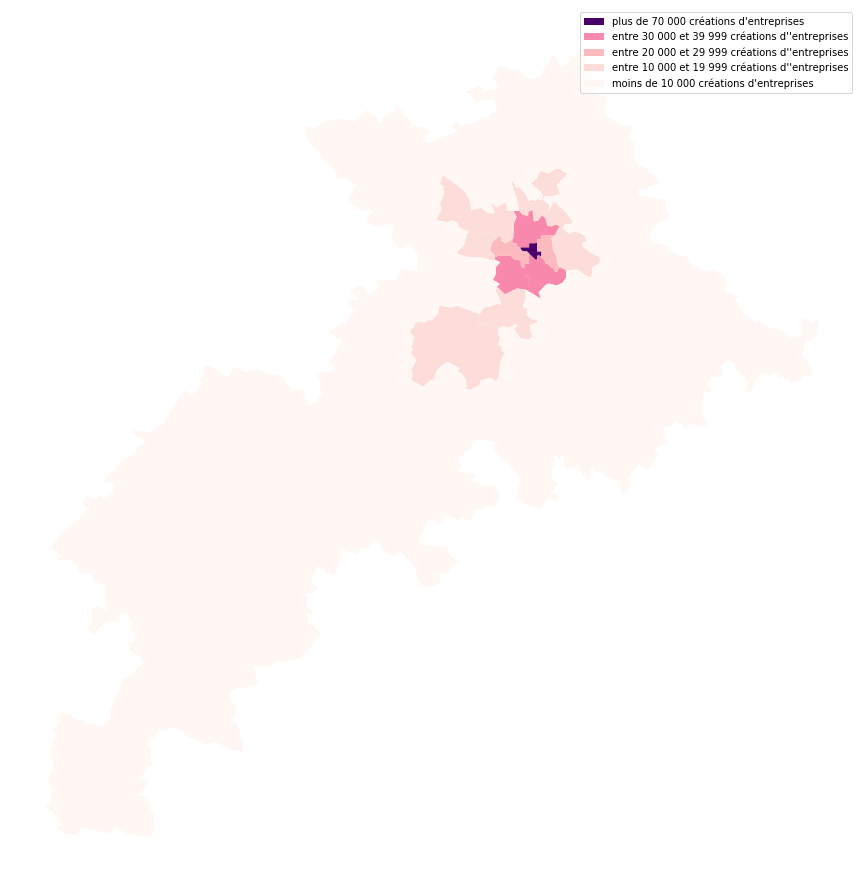

In [52]:
ax = map_hautegaronne_companies.plot(figsize=(16,16),column='creation', cmap='RdPu')
# Turns off-grid on the left Axis.
ax.grid(False)
ax.axis('off')

legends = [Patch(facecolor='#49006a', label="plus de 70 000 créations d'entreprises"),
          Patch(facecolor='#f988ad', label="entre 30 000 et 39 999 créations d''entreprises"),
          Patch(facecolor='#fbbabd', label="entre 20 000 et 29 999 créations d''entreprises"),
          Patch(facecolor='#fdddd9', label="entre 10 000 et 19 999 créations d''entreprises"),
          Patch(facecolor='#fff7f3', label="moins de 10 000 créations d'entreprises")]

ax.legend(handles=legends, loc='upper right')


In [47]:
map_hautegaronne_companies.sort_values(by='creation', ascending=False)

,ID,LIB,DEP,SURF,POP2010,MEN2010,geometry,creation
0,31000,Toulouse,31,4.936202,57090.394875,34899.408866,"POLYGON ((574858.950 6281208.030, 574976.040 6...",7
11,31200,Toulouse,31,29.047523,80640.795148,41265.105135,"POLYGON ((570608.460 6281688.195, 570850.020 6...",3
1,31100,Toulouse,31,28.187735,80541.104283,34952.605606,"MULTIPOLYGON (((567401.040 6274836.945, 567401...",3
33,31400,Toulouse,31,27.438029,85987.073820,47594.359435,"POLYGON ((572753.010 6276996.000, 572869.980 6...",3
44,31500,Toulouse,31,12.956903,82064.380700,43466.959279,"POLYGON ((574858.950 6281208.030, 574976.040 6...",2
...,...,...,...,...,...,...,...,...
34,31410,Noé,31,119.618996,15020.000000,5712.533000,"POLYGON ((565697.970 6249866.940, 566595.000 6...",0
36,31430,Le Fousseret,31,154.120821,5081.000000,2004.660800,"POLYGON ((548463.990 6246609.015, 548757.960 6...",0
37,31440,Saint-Béat,31,211.259977,3796.000000,1866.580300,"POLYGON ((520100.010 6195950.010, 518270.010 6...",0
38,31530,Lévignac,31,126.910258,10086.000000,3787.603900,"POLYGON ((557704.050 6285062.985, 556454.040 6...",0


In [48]:
map_hautegaronne_companies.sort_values(by='creation', ascending=False)['creation'].unique()

array([7, 3, 2, 1, 0])

## 2019 analysis

In [70]:
companies_by_postalcode = df_companies[df_companies['year'] == '2019'].groupby('codepostal')['creation'].count()
max_creation = companies_by_postalcode.max()
step = max_creation // 4
step = 1000

def classify_creation(value):
    target = value // step
    return target

companies_creationclass_by_postalcode = companies_by_postalcode.apply(classify_creation)

In [71]:
map_hautegaronne_companies = map_hautegaronne_postalcodes.merge(companies_creationclass_by_postalcode, left_on='ID', right_on='codepostal')

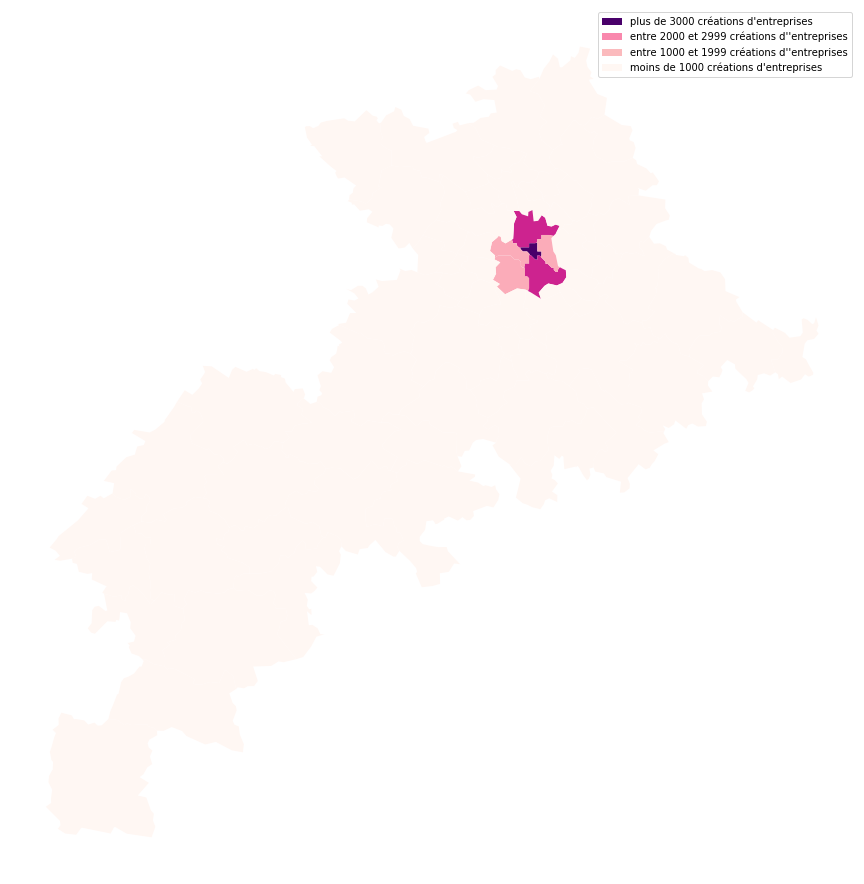

In [72]:
ax = map_hautegaronne_companies.plot(figsize=(16,16),column='creation', cmap='RdPu')
# Turns off-grid on the left Axis.
ax.grid(False)
ax.axis('off')

legends = [Patch(facecolor='#49006a', label="plus de {} créations d'entreprises".format(step*3)),
          Patch(facecolor='#f988ad', label="entre {} et {} créations d''entreprises".format(step*2,step*3 -1)),
          Patch(facecolor='#fbbabd', label="entre {} et {} créations d''entreprises".format(step,step*2 -1)),          
          Patch(facecolor='#fff7f3', label="moins de {} créations d'entreprises".format(step))]

ax.legend(handles=legends, loc='upper right')